## Part 1: Small world networks

Reading: For this part, we'll read the remaining part of Network Science Chapter 3, Section 3.5 - 3.10, with *emphasis* on 3.8 and 3.9.

- What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

"Taken together, in a random society all individuals are expected to have a comparable number of friends. Hence if people are randomly connected to each other, we lack outliers: There are no highly popular individuals, and no one is left behind, having only a few friends. This suprising conclusion is a consequence of an important property of random networks: in a large random network the degree of most nodes is in the narrow vicinity of ‹k›"

- List the four regimes that characterize random networks as a function of ⟨k⟩.

1. Subcritical Regime: 0 ‹ ‹k› ‹ 1 (p ‹ 1/N) : only a small number of links in this regime, hence we mainly observe tiny clusters. For ‹k› = 0 the network consists of N isolated nodes.
2. Critical Point: ‹k› = 1 (p = 1/N) : At this point the relative size of the largest component is still zero (Image 3.7c). Indeed, the size of the largest component is NG ~ N2/3. Consequently NG grows much slower than the network’s size, so its relative size decreases as NG/N ~ N -1/3 in the N→∞ limit.
3. Supercritical Regime: ‹k› › 1 (p › 1/N) : in the supercritical regime numerous isolated components coexist with the giant component, their size distribution following (3.35). These small components are trees, while the giant component contains loops and cycles.
4. Connected Regime: ‹k› › lnN (p › lnN/N) : For sufficiently large p the giant component absorbs ALL nodes and components hence NG ≃ N.


- According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

In real networks the clustering coefficient stays more or less the same even though the average degree goes down. This is the case as it is more likely that nodes are connected to their neighbor's neighbor, than a random node in the system. 


### Exercises: WS edition.

- First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0, 0.1, and 1. Calculate the average shortest path length ⟨d⟩ for each one.
- Describe what happens to the network when p=1.
- Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.
- Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).
- Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

##### punkt 1 + 2


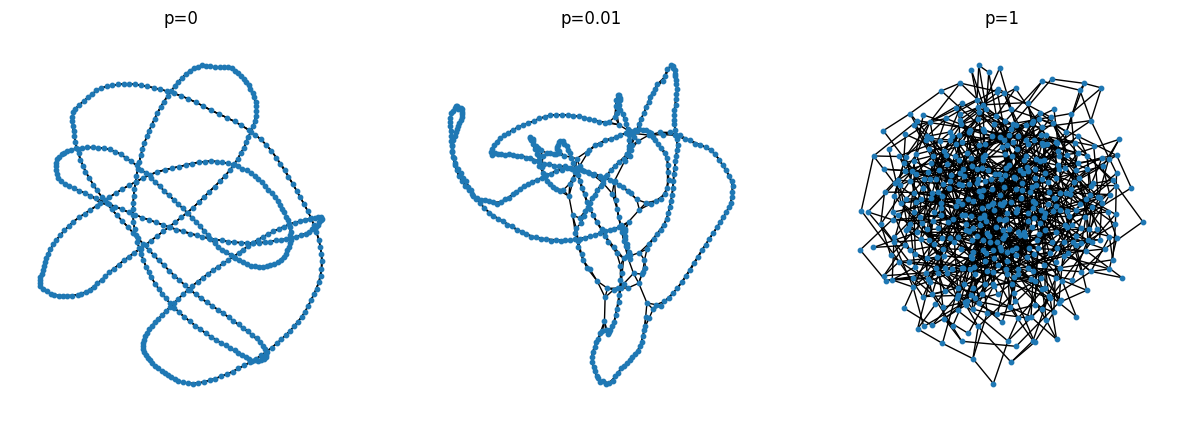

Average shortest path length for G1:  62.875751503006015
Average shortest path length for G2:  22.626044088176354
Average shortest path length for G3:  4.763647294589179
Clustering coefficient for G1:  0.5
Clustering coefficient for G2:  0.4848
Clustering coefficient for G3:  0.008268253968253968


In [3]:
import networkx as nx

G1 = nx.watts_strogatz_graph(500, 4, 0, seed = 1234)
G2 = nx.watts_strogatz_graph(500, 4, 0.01, seed = 1234)
G3 = nx.watts_strogatz_graph(500, 4, 1, seed = 1234)

# plot graphs
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(131)
nx.draw(G1, node_size=10)
plt.title("p=0")
plt.subplot(132)
nx.draw(G2, node_size=10)
plt.title("p=0.01")
plt.subplot(133)
nx.draw(G3, node_size=10)
plt.title("p=1")
plt.show()

# averge shortest path length for each graph
print("Average shortest path length for G1: ", nx.average_shortest_path_length(G1))
print("Average shortest path length for G2: ", nx.average_shortest_path_length(G2))
print("Average shortest path length for G3: ", nx.average_shortest_path_length(G3))

# clustering coefficient for each graph
print("Clustering coefficient for G1: ", nx.average_clustering(G1))
print("Clustering coefficient for G2: ", nx.average_clustering(G2))
print("Clustering coefficient for G3: ", nx.average_clustering(G3))



Man kan se at der er igen rewiring i den første graf, da chancen for at det sker er nu. Dvs. det er en lang slange, hvor at noder kun er connected til naboers naboer (4 connections). Dette er svært at se på slangen, når der er 500 noder, men det ses tydeligt hvis man sætter node antallet ned. For nr. 2, er der sket meget få rewirings til random noder, så der er stadig samme "slangestruktur", men med få radom connections. Hermed meget høj clustering coefficient og meget høj average shortest path. I dette network er der stadig høj clustering coefficient, men lavere average shortest path length. I den sidste, er der en tydeligt meget laver clustering og grafen er en random graf, da alle connections er rewired. Hermed er avg. shortest path også markant lavere.

#### punkt 3

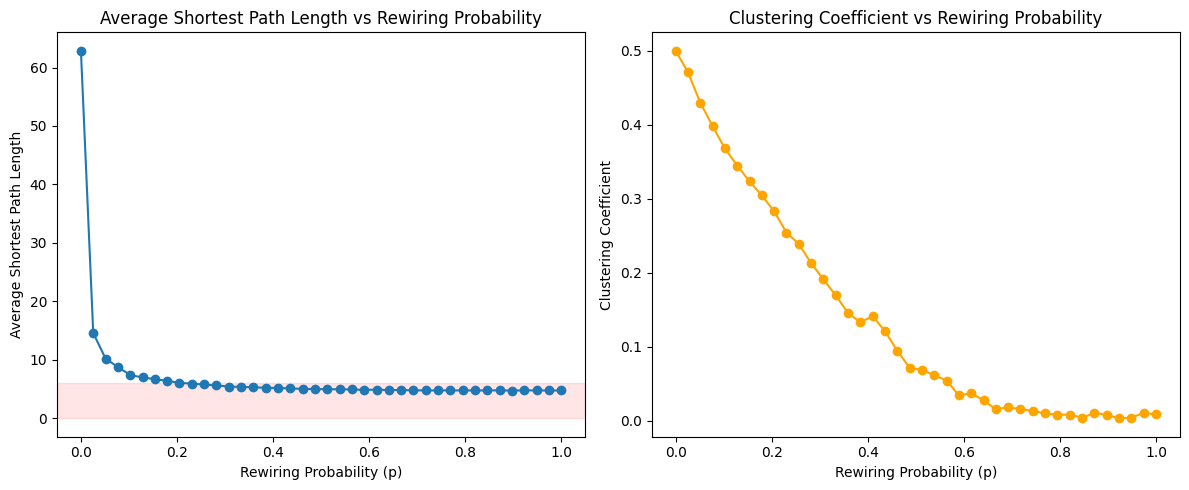

The value of p where the average shortest path length drops below 6 is approximately: 0.23077


In [14]:
# Generate a lot of networks with different values of p from 0 to 1
import numpy as np

p_values = np.linspace(0, 1, num=40)
avg_shortest_paths = []
clustering_coeffs = []
for p in p_values:
    G = nx.watts_strogatz_graph(500, 4, p, seed=1234)
    avg_shortest_paths.append(nx.average_shortest_path_length(G))
    clustering_coeffs.append(nx.average_clustering(G))

# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(p_values, avg_shortest_paths, marker='o')
plt.axhspan(0, 6, color='red', alpha=0.1)  # highlight area where avg shortest path < 6
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.subplot(122)
plt.plot(p_values, clustering_coeffs, marker='o', color='orange')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient vs Rewiring Probability')
plt.tight_layout()
plt.show()

# Find the value of p where the average shortest path length drops below 6
for p, avg_path in zip(p_values, avg_shortest_paths):
    if avg_path < 6:
        print(f"The value of p where the average shortest path length drops below 6 is approximately: {p:.5f}")
        break



#### punkt 4

In [ ]:
# Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. 
# Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, 
# to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. 
# Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_shortest_paths = []
std_shortest_paths = []
for p in p_values:
    paths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        paths.append(nx.average_shortest_path_length(G))
    avg_shortest_paths.append(np.mean(paths))
    std_shortest_paths.append(np.std(paths))

# Plot the results with error bars
plt.figure(figsize=(8, 5))
plt.errorbar(p_values, avg_shortest_paths, yerr=std_shortest_paths, fmt='o-', capsize=5)
plt.axhspan(0, 6, color='red', alpha=0.1)  # highlight area where avg shortest path < 6
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability with Error Bars')
plt.show()
